In [1]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/literacy_female.xls',
               dest_file_name='Dataset/employment/literacy_female.xlsx')

p.save_book_as(file_name='Dataset/employment/Employment_services_female.xls',
               dest_file_name='Dataset/employment/Employment_services_female.xlsx')

in_file ="Dataset/employment/literacy_female.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

in_file1 ="Dataset/employment/Employment_services_female.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/literacy_services_female.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,266):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	for cols in range(3,63):
		#print(oldws.cell(row =2, column = cols).value)
		data_point=oldws.cell(row = process_line, column = cols).value
		if data_point!=None:
			for line in range(2,189):
				if oldws1.cell(row = line, column = 1).value==country_name:
					data_point_2=oldws1.cell(row = line, column = cols).value
					if data_point_2!=None:
					#save data point from both file
						newws.cell(row =i, column = 1).value = country_name
						newws.cell(row =i, column = 2).value = oldws.cell(row = 1, column = cols).value
						newws.cell(row =i, column = 3).value = data_point
						newws.cell(row =i, column = 4).value = data_point_2
						i=i+1
		
newwb.save(str(out_file))

#employment_agriculture is done

In [2]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df = pd.read_excel('Dataset/employment/literacy_services_female.xlsx', index_col=0) 

In [3]:
correlated_features = set()
correlation_matrix = df.corr()

In [4]:
print(correlation_matrix)

                        Year  Literacy  Employ_Agriculture
Year                1.000000  0.202493            0.205167
Literacy            0.202493  1.000000            0.674085
Employ_Agriculture  0.205167  0.674085            1.000000


In [5]:
column_1 = df["Literacy"]
column_2 = df["Employ_Agriculture"]
correlation = column_1.corr(column_2)
print(correlation)

0.674084703490613


In [6]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
matplotlib.pyplot.savefig("Literacy vs employment")

In [7]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/GenderEmploymentIndex.xlsx',
               dest_file_name='Dataset/employment/GenderEmploymentIndex.xlsx')


in_file ="Dataset/employment/GenderEmploymentIndex.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]



in_file1 ="Dataset/employment/GPI_3_factors.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,189):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	income_group=oldws.cell(row = process_line, column = 2).value
	if income_group=="Upper middle income":
		for cols in range(4,34):
			#print(oldws.cell(row =2, column = cols).value)
			year=oldws.cell(row = 1, column = cols).value
			data_point=oldws.cell(row = process_line, column = cols).value
			data_point_2=oldws1.cell(row = process_line, column = cols).value
			newws.cell(row =i, column = 1).value = country_name
			newws.cell(row =i, column = 2).value = income_group
			newws.cell(row =i, column = 3).value = year
			newws.cell(row =i, column = 4).value = data_point_2
			newws.cell(row =i, column = 5).value = data_point
			i=i+1



newwb.save(str(out_file))

In [8]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df1 = pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx', index_col=0) 

In [9]:
correlated_features = set()
correlation_matrix1 = df1.corr()

In [10]:
print(correlation_matrix1)

                       Year       GPI  Gender_Employment
Year               1.000000  0.033229          -0.031184
GPI                0.033229  1.000000           0.850256
Gender_Employment -0.031184  0.850256           1.000000


In [11]:
column_1 = df1["GPI"]
column_2 = df1["Gender_Employment"]
correlation1 = column_1.corr(column_2)
print(correlation1)

0.8502556432207031


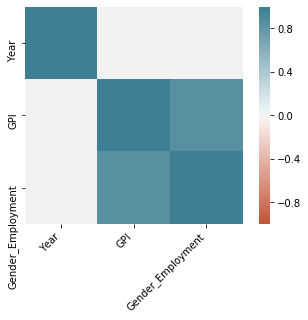

In [12]:
#heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(
    correlation_matrix1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("GPI vs Gender employment")

In [13]:
df_gpi=pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx')

In [14]:

label_array = df1.index.unique()


In [15]:

UniqueNames = df1.index.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df1[:][df1.index == key]

In [16]:
len(DataFrameDict)

50

Correlation matrix for individual country

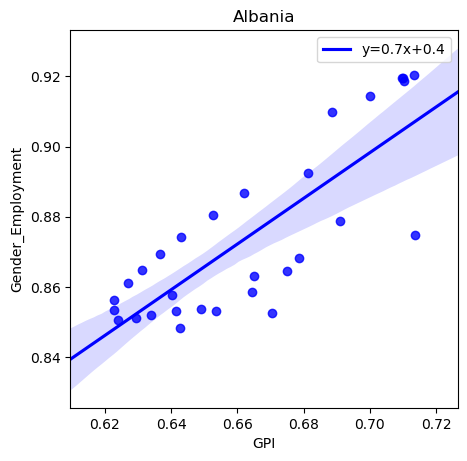

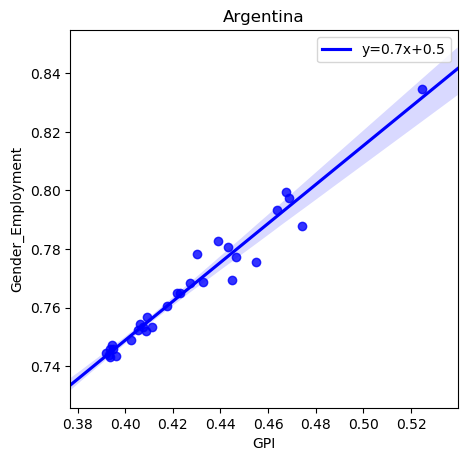

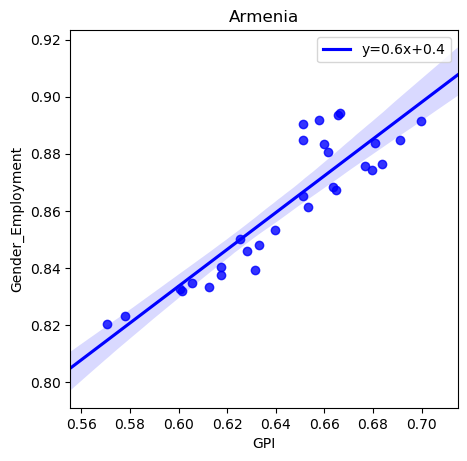

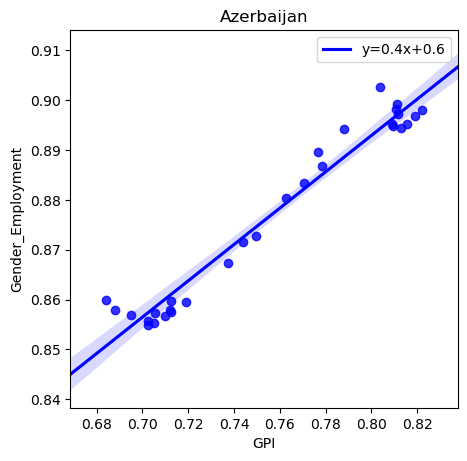

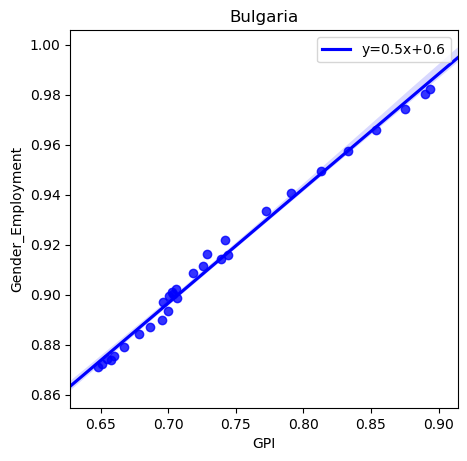

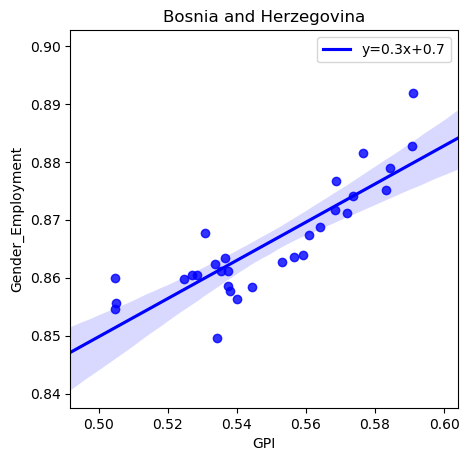

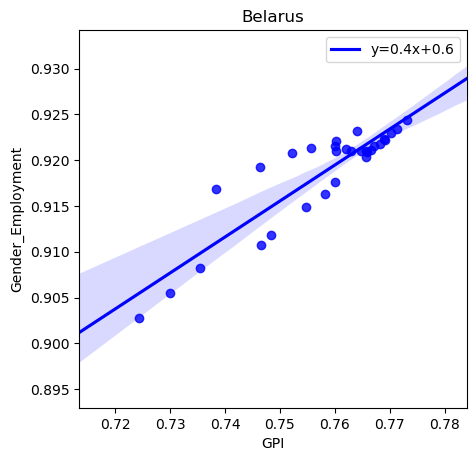

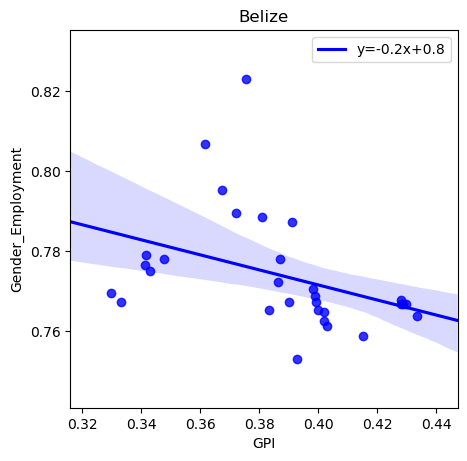

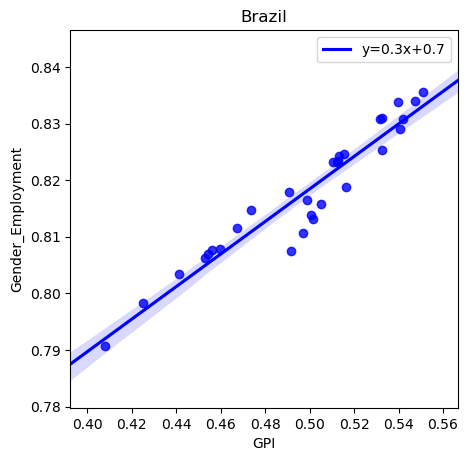

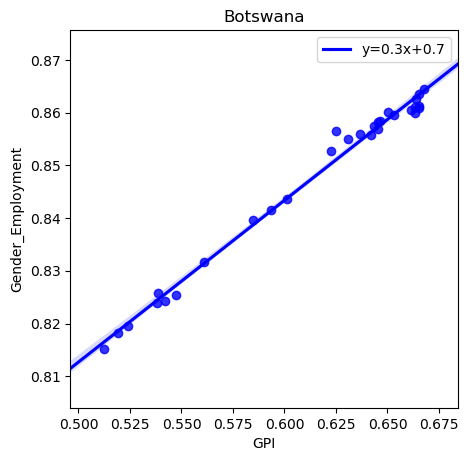

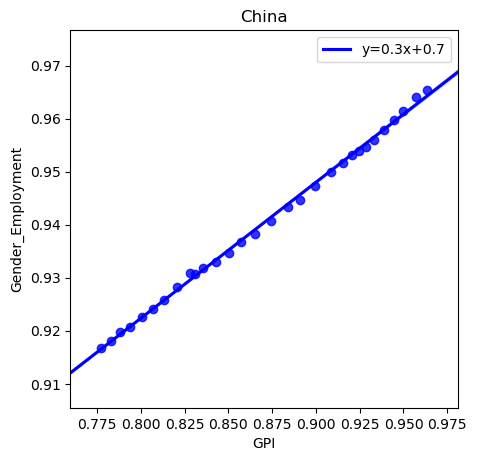

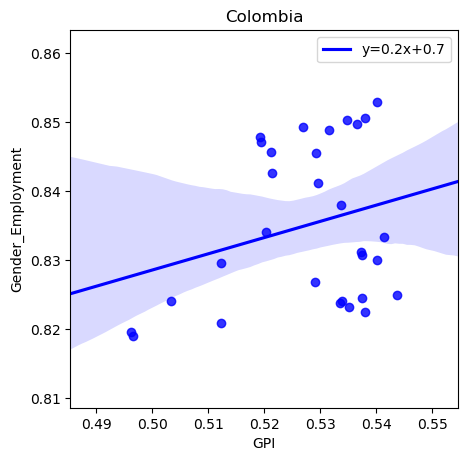

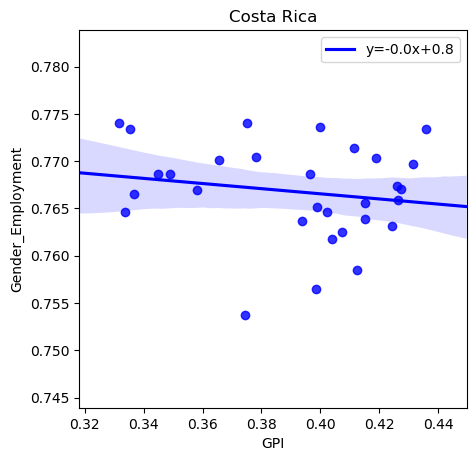

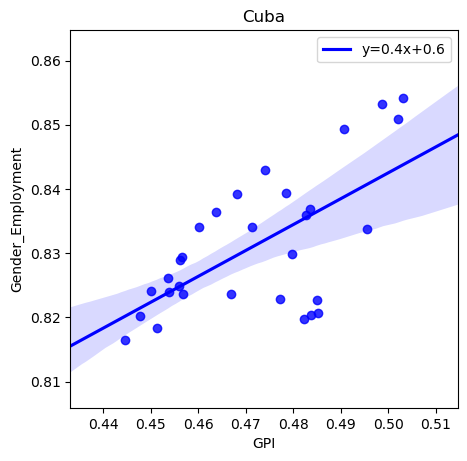

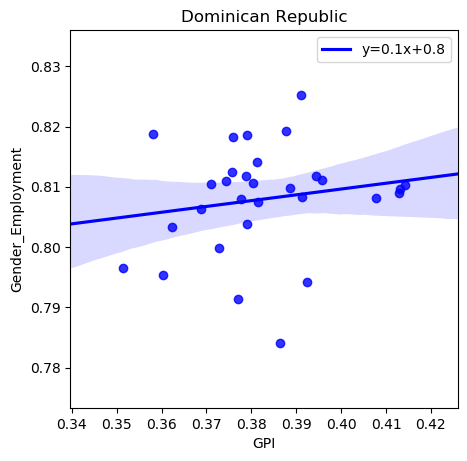

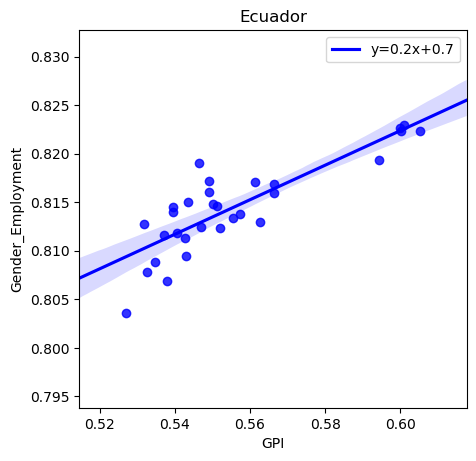

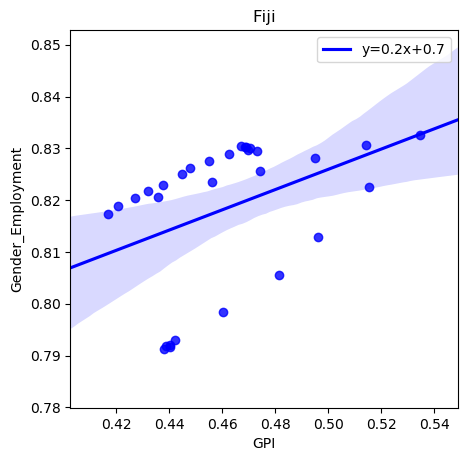

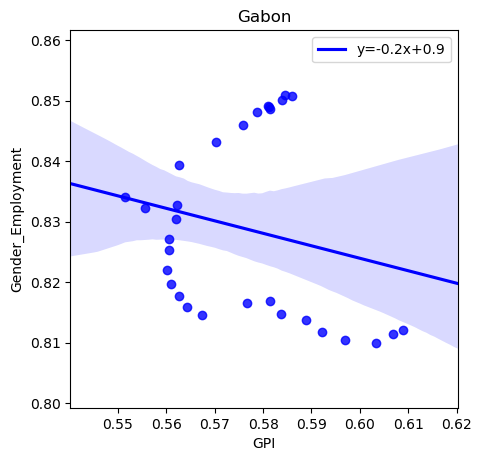

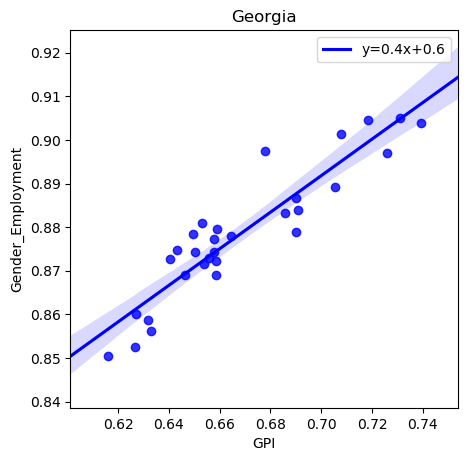

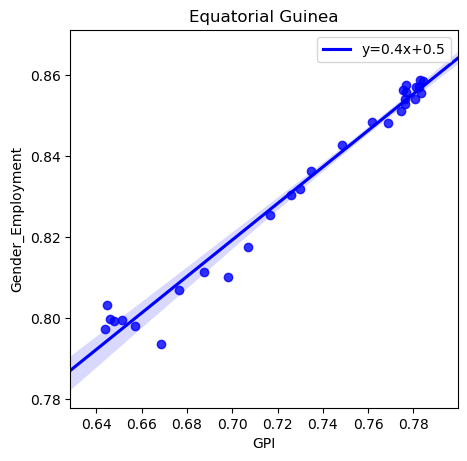

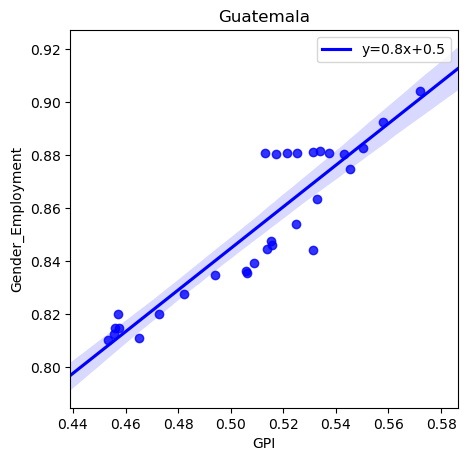

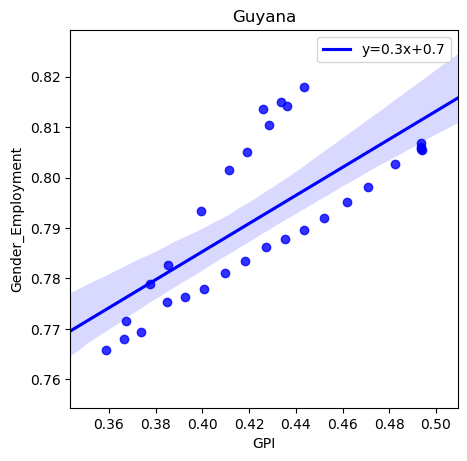

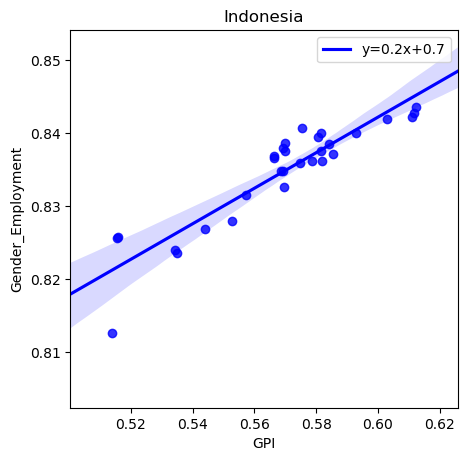

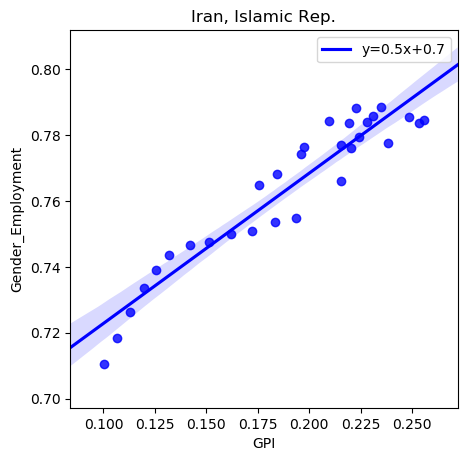

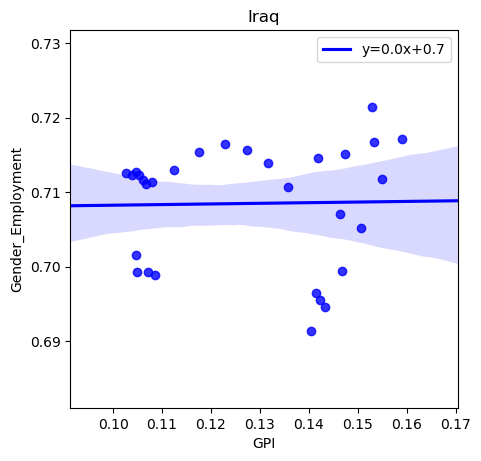

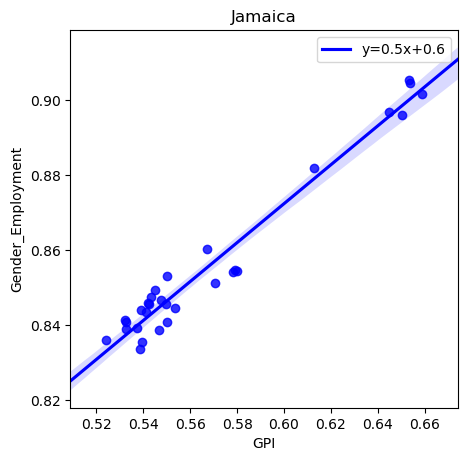

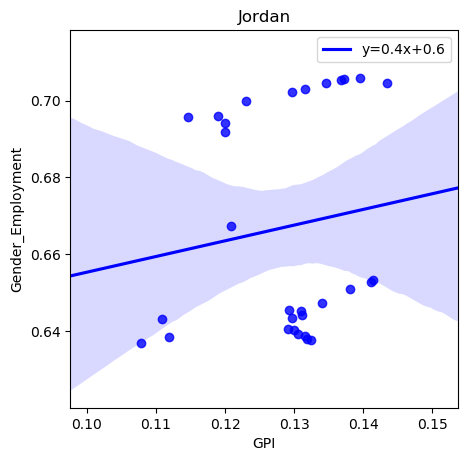

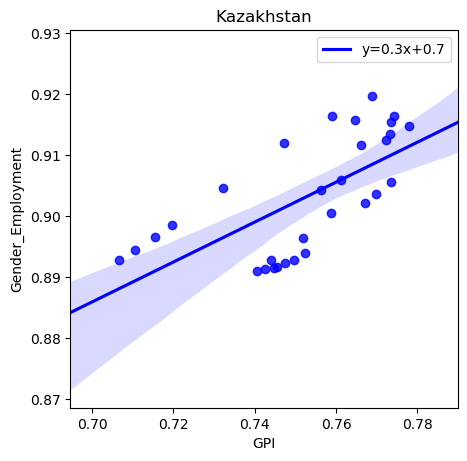

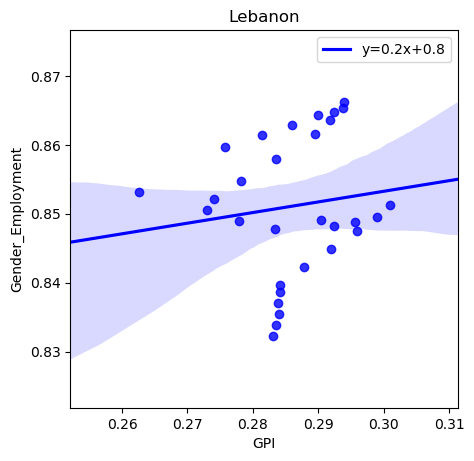

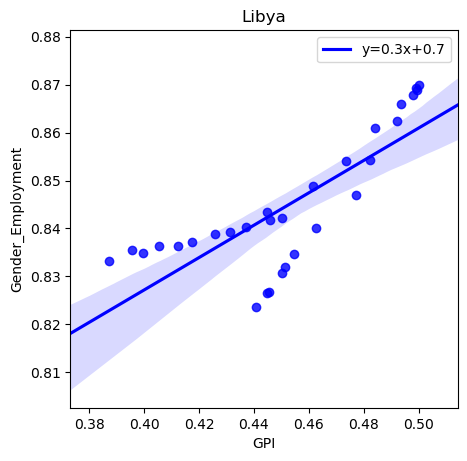

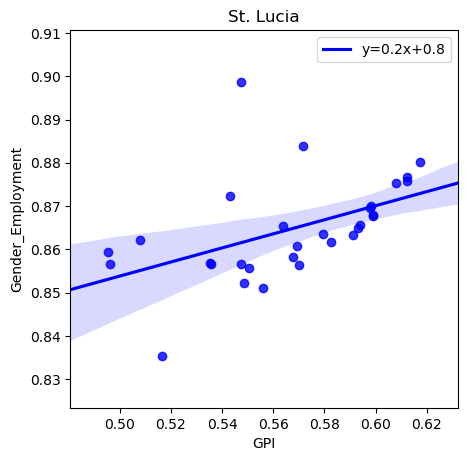

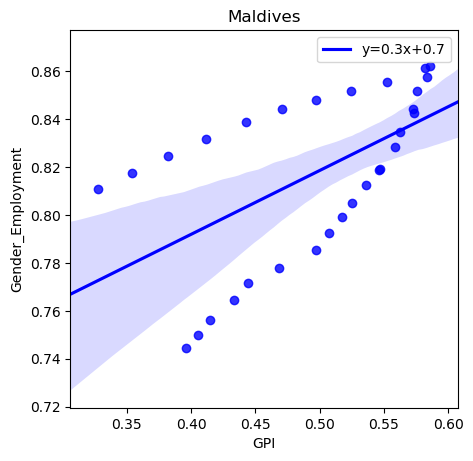

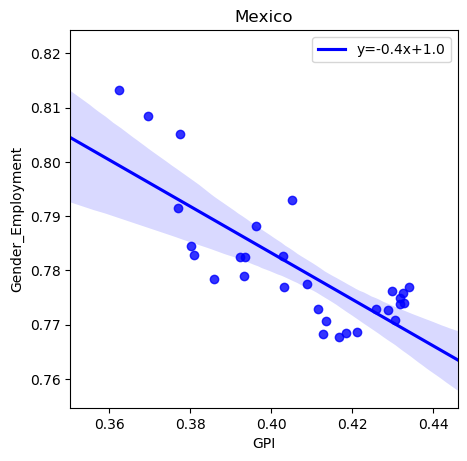

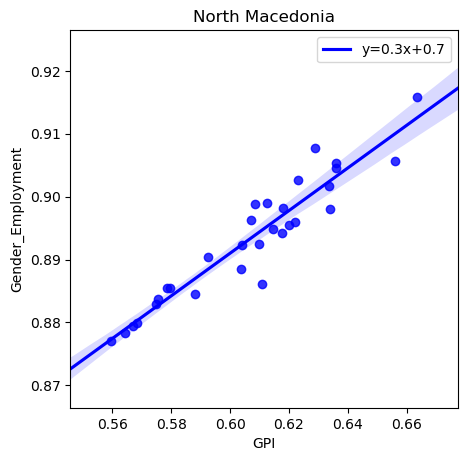

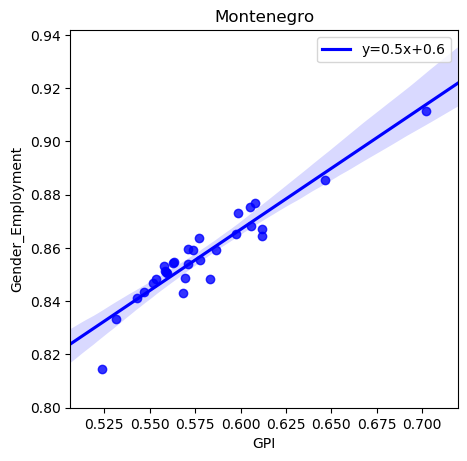

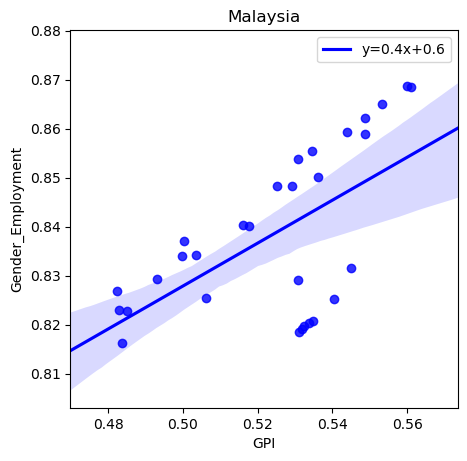

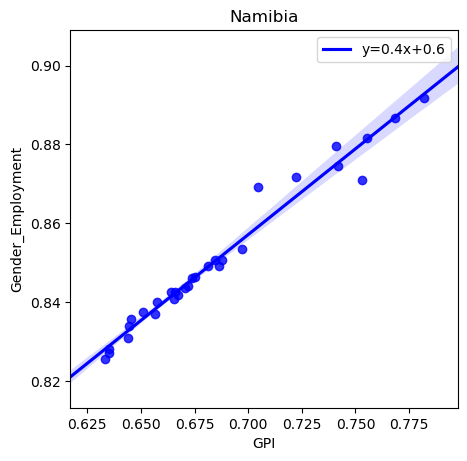

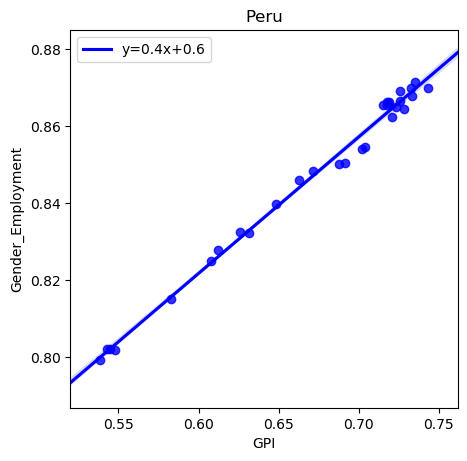

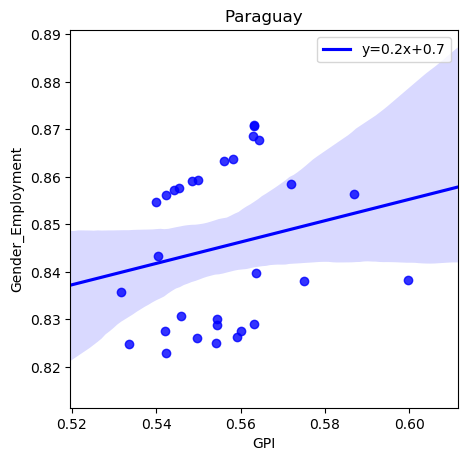

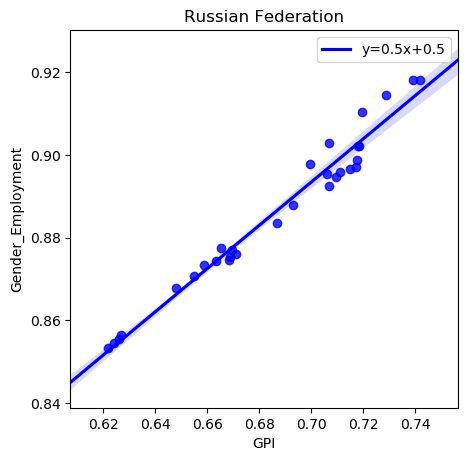

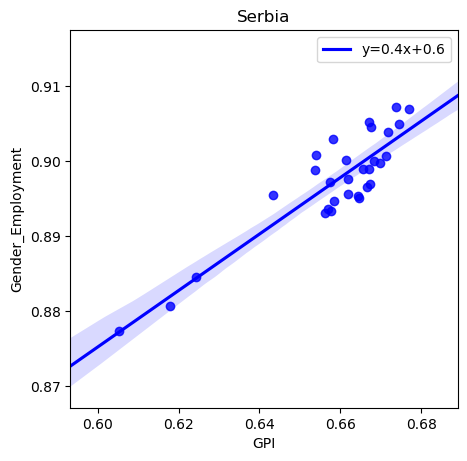

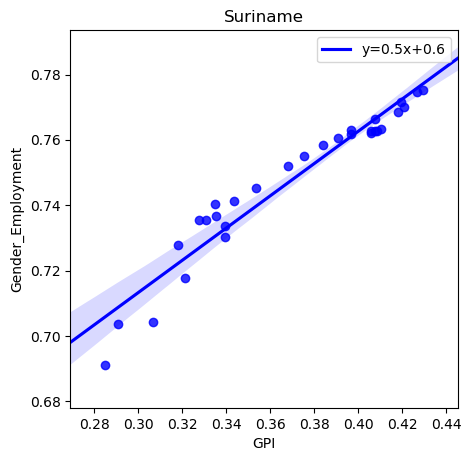

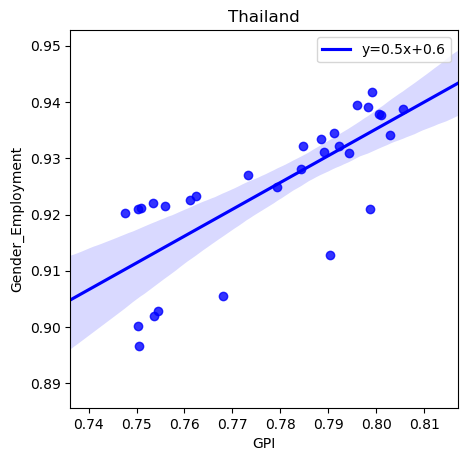

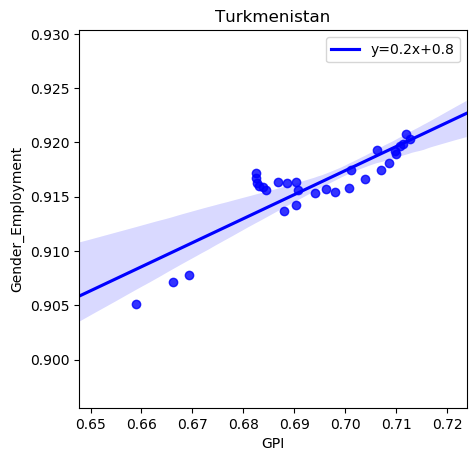

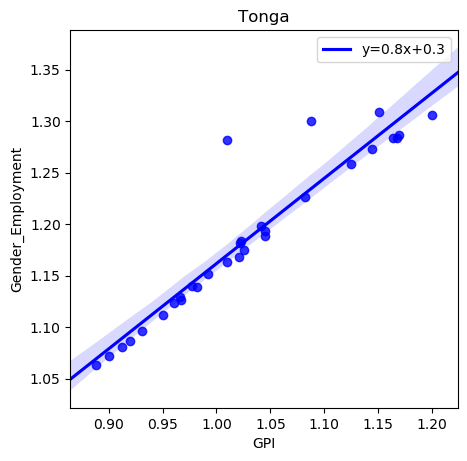

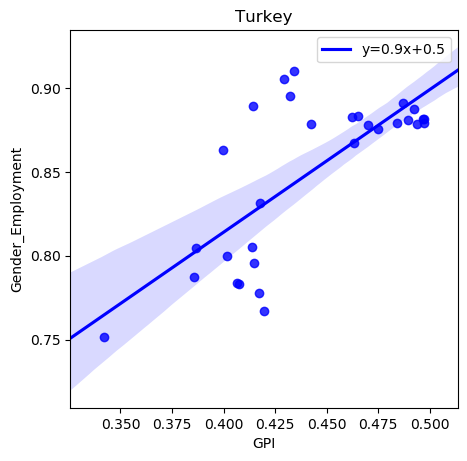

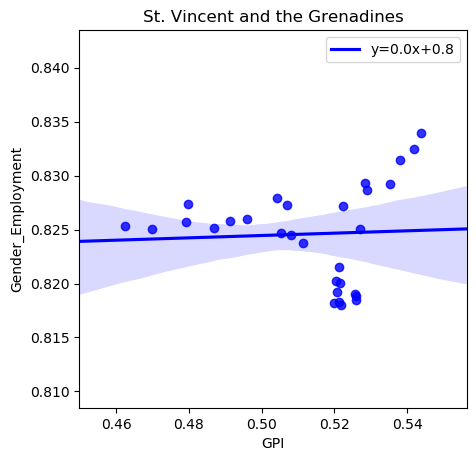

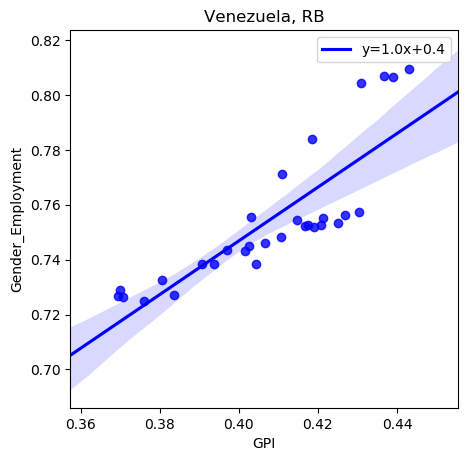

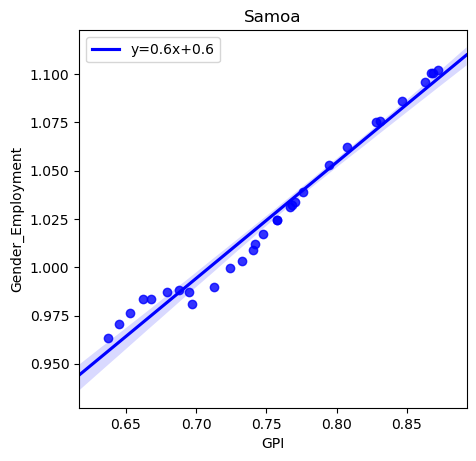

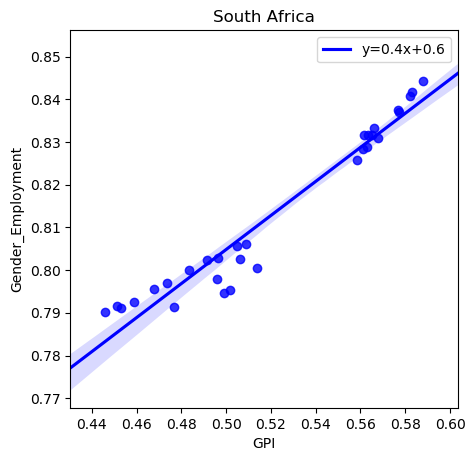

In [17]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

keys_list = list(DataFrameDict)
for i in range(len(keys_list)):
    df1=DataFrameDict[keys_list[i]]
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    slope, intercept, r_value, p_value, std_err = stats.linregress(df1['GPI'],df1['Gender_Employment'])
    ax = sns.regplot(x='GPI', y='Gender_Employment', data=df1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.title(keys_list[i]);
    ax.legend()
    plt.savefig(str(keys_list[i])+"figure.png")
    plt.show()




In [18]:
import pandas as pd
df_economy_types = pd.read_excel("Dataset/employment/economy_types.xlsx")

In [19]:
dict_GPI = {'Country_name' : df_gpi['Country_name'], 'Income_group' : df_gpi['Income_group'], 'Region' : df_economy_types['Region'],'GPI':df_gpi['GPI'],'Gender_Employment':df_gpi['Gender_Employment'] }

df_GenderEmploymentIndex = pd.DataFrame(dict_GPI)

In [20]:
df_contributing_female = pd.read_excel("Dataset/employment/Contributing_family _workers_female.xls")
region_df = pd.merge(df_economy_types, df_contributing_female, on='Country Code').loc[:,:'Country Name']
region_df = region_df.rename({'Country Name':'Country_name'}, axis='columns')


In [21]:
merged_df = pd.merge(df_gpi, region_df, on='Country_name').loc[:,:'Region']

In [22]:
df = merged_df.groupby(['Region','Year'])

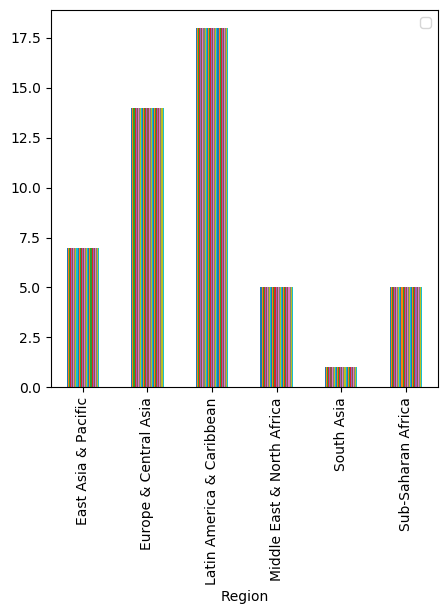

In [23]:
pd.crosstab(merged_df['Region'],merged_df['Year']).plot.bar()
plt.legend('')

In [24]:
print(df.first())

                         Country_name         Income_group       GPI  \
Region              Year                                               
East Asia & Pacific 1991        China  Upper middle income  0.963212   
                    1992        China  Upper middle income  0.956942   
                    1993        China  Upper middle income  0.950008   
                    1994        China  Upper middle income  0.944558   
                    1995        China  Upper middle income  0.939034   
                    1996        China  Upper middle income  0.933450   
                    1997        China  Upper middle income  0.928491   
                    1998        China  Upper middle income  0.924679   
                    1999        China  Upper middle income  0.920712   
                    2000        China  Upper middle income  0.915296   
                    2001        China  Upper middle income  0.908775   
                    2002        China  Upper middle income  0.89

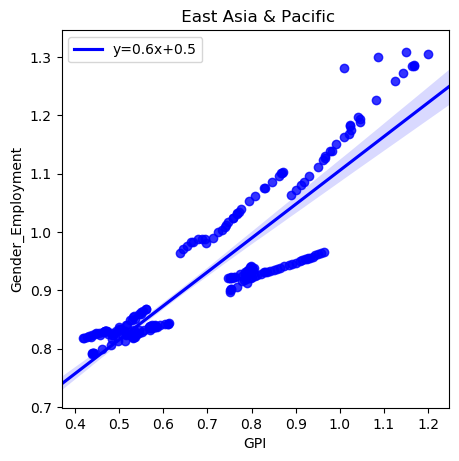

R-value 0.8032544587372293


In [41]:
reg1  = merged_df.loc[merged_df['Region'] == "East Asia & Pacific"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title(' East Asia & Pacific');
ax.legend()
plt.savefig("GPI vs Gender_Employment East Asia & Pacific.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)


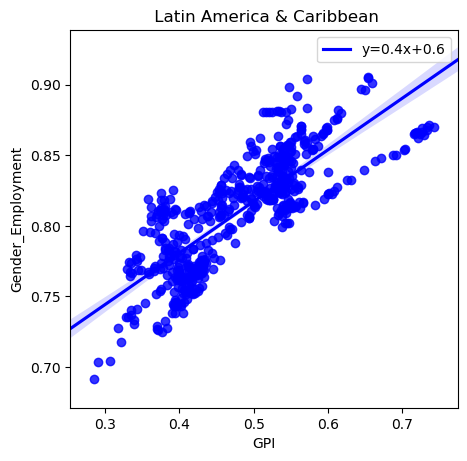

R-value 0.6545699704195913


In [42]:
reg1  = merged_df.loc[merged_df['Region'] == "Latin America & Caribbean"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title(' Latin America & Caribbean');
ax.legend()
plt.savefig("GPI vs Gender_Employment Latin America & Caribbean.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)


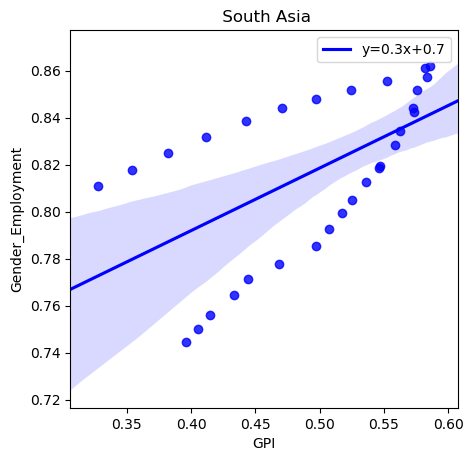

R-value 0.3297203154485488


In [43]:
reg1  = merged_df.loc[merged_df['Region'] == "South Asia"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title(' South Asia');
ax.legend()
plt.savefig("GPI vs Gender_Employment South Asia.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)


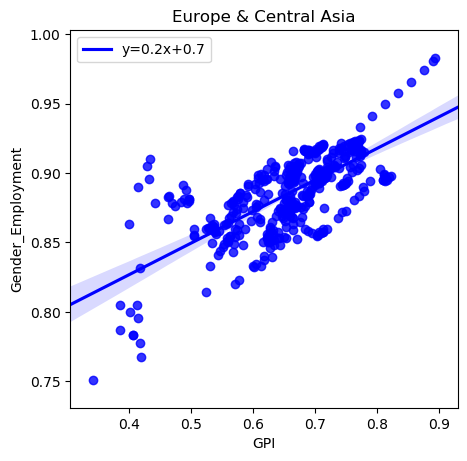

R-value 0.49958241057895986


In [44]:
reg1  = merged_df.loc[merged_df['Region'] == "Europe & Central Asia"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title('Europe & Central Asia');
ax.legend()
plt.savefig("GPI vs Gender_Employment Europe & Central Asia.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)


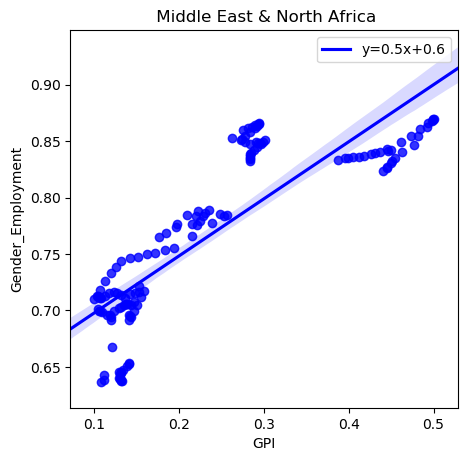

R-value 0.7105049870064011


In [45]:
reg1  = merged_df.loc[merged_df['Region'] == "Middle East & North Africa"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title(' Middle East & North Africa');
ax.legend()
plt.savefig("GPI vs Gender_Employment Middle East & North Africa.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)

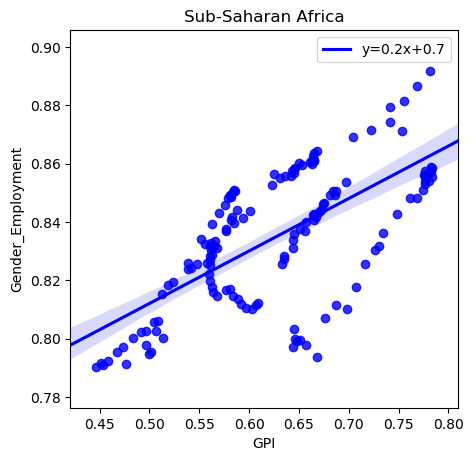

R-value 0.4521749025394552


In [46]:
reg1  = merged_df.loc[merged_df['Region'] == "Sub-Saharan Africa"]

#create a data frame dictionary to store your data frames

plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
slope, intercept, r_value, p_value, std_err = stats.linregress(reg1['GPI'],reg1['Gender_Employment'])
ax = sns.regplot(x='GPI', y='Gender_Employment', data=reg1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.title('Sub-Saharan Africa');
ax.legend()
plt.savefig("GPI vs Gender_Employment Sub-Saharan Africa.png")
plt.show()

correlation_matrix = np.corrcoef(reg1['GPI'],reg1['Gender_Employment'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R-value",r_squared)

In [47]:
#calculate Pearson's coefficient for region based data
pearsoncorr = merged_df.corr(method='pearson')
pearsoncorr

,Year,GPI,Gender_Employment
Year,1.000000,0.033229,-0.031184
GPI,0.033229,1.000000,0.850256
Gender_Employment,-0.031184,0.850256,1.000000


A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the maroon shows very strong correlations. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
Looking at this we can quickly see that:
The Gender parity index(GPI) is strongly correlated to Gender employment


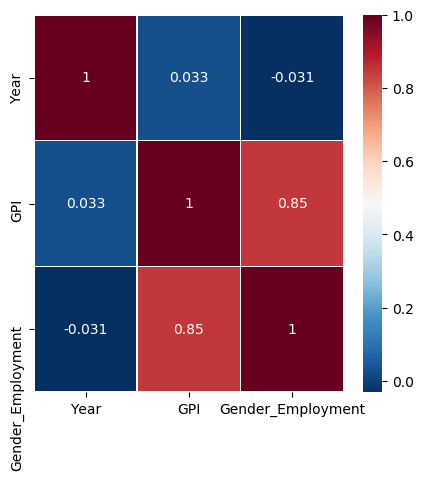

In [32]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
matplotlib.pyplot.savefig('pearsonn.png')

In [33]:
df1 = pd.read_excel('Dataset/employment/literacy_services_female.xlsx') 
df1 = df1.rename({'Country':'Country_name'}, axis='columns')
merged_df1 = pd.merge(df1, region_df, on='Country_name').loc[:,:'Region']

In [34]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [35]:
edm = pd.read_excel('Dataset/employment/literacy_services_female.xlsx') 
edm1 = pd.read_excel('Dataset/employment/literacy_services_male.xlsx') 

print(edm.head())
print(edm1.head())



       Country  Year   Literacy  Employ_Agriculture
0  Afghanistan  2011  17.017839           10.359000
1  Afghanistan  2018  29.805210            9.828000
2       Angola  2001  54.194489           53.444000
3       Angola  2014  53.407211           40.915001
4      Albania  2001  98.252274           30.639000
       Country  Year   Literacy  Employ_Agriculture
0  Afghanistan  2011  45.417099           35.654999
1  Afghanistan  2018  55.475449           45.980999
2       Angola  2001  82.919868           54.747002
3       Angola  2014  79.974152           40.296001
4      Albania  2001  99.187607           39.063000


In [36]:
edm.rename(index=str, columns={'Employ_Agriculture':'Employment_agri','Country':'Country_name'},
                               inplace=True)

edm = pd.merge(edm, region_df, on='Country_name').loc[:,:'Region']

edm1.rename(index=str, columns={'Employ_Agriculture':'Employment_agri','Country':'Country_name'},
                               inplace=True)

edm1 = pd.merge(edm1, region_df, on='Country_name').loc[:,:'Region']


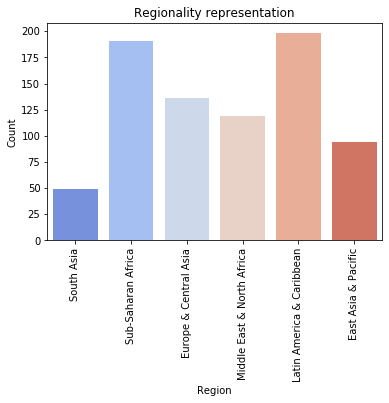

In [37]:
counts = sns.countplot(x='Region', data=edm, palette='coolwarm')
counts.set(xlabel='Region', ylabel='Count', title='Regionality representation')
plt.xticks(rotation=90)
plt.savefig('rep.png')
plt.show()


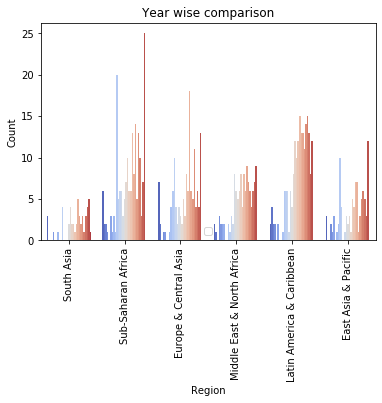

In [38]:
sem = sns.countplot(x='Region', hue='Year', order=['South Asia', 'Sub-Saharan Africa','Europe & Central Asia','Middle East & North Africa','Latin America & Caribbean','East Asia & Pacific'], data=edm, palette='coolwarm')
sem.set(xlabel='Region', ylabel='Count', title='Year wise comparison')
plt.xticks(rotation=90)
plt.legend('')
plt.savefig('rep1.png')
plt.show()

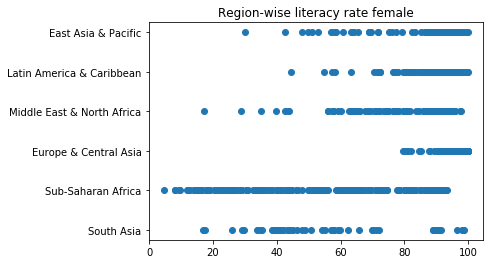

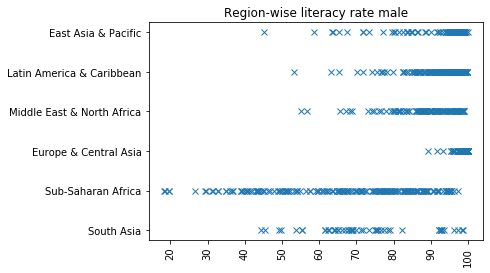

In [39]:
fig = plt.figure()

for frame in [edm]:
    plt.plot( frame['Literacy'],frame['Region'],'o')
plt.title("Region-wise literacy rate female")
plt.show()
for frame in [edm1]:
    plt.plot(frame['Literacy'],frame['Region'],'x')
plt.xticks(rotation=90)
plt.title("Region-wise literacy rate male")
plt.show()


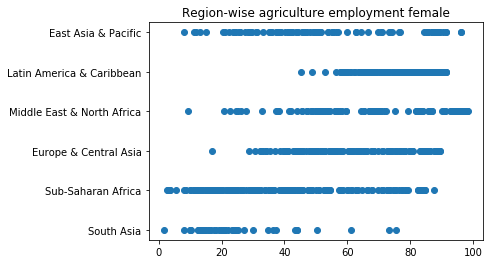

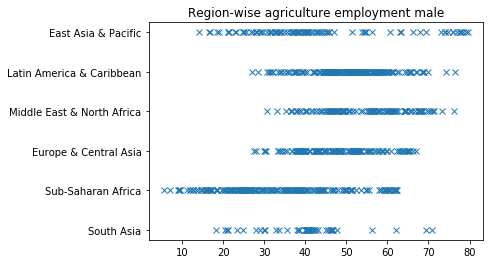

In [40]:
fig = plt.figure()

for frame in [edm]:
    plt.plot(frame['Employment_agri'],frame['Region'],'o')

plt.title("Region-wise agriculture employment female")
plt.show()
for frame in [edm1]:
    plt.plot(frame['Employment_agri'],frame['Region'],'x')
plt.title("Region-wise agriculture employment male")
plt.show()